In [25]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time

%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(31)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Activaton Functions Definition

In [3]:
### Sigmoid functions ----> forward and backward

def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    #print("\nShape of A after sigmoidizing-->", A.shape)
    cache = Z
    
    return A, cache

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert(dZ.shape == Z.shape)
    
    return dZ


### Relu functions ----> forward and backward

def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    
    assert(A.shape == Z.shape)
    return A, cache

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0
    
    assert(dZ.shape == Z.shape)
    return dZ

# Initialize Parameters

In [4]:
def init_parameters(layer_dims):
    parameters = {}
    np.random.seed(31)
    
    for i in range(1, len(layer_dims)):
        
        parameters['W' + str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1]) * 0.01
        parameters['b' + str(i)] = np.zeros((layer_dims[i], 1))

        assert( parameters['W' + str(i)].shape == (layer_dims[i], layer_dims[i-1]) )
        assert( parameters['b' + str(i)].shape == (layer_dims[i], 1) )

    return parameters

In [ ]:
param = init_parameters([5, 3, 3, 2])
param

# Feed Forward Model

In [5]:
def feed_forward_model(train_data, parameters):
    
    A = train_data
    L = len(parameters) // 2
    caches = {}
    
    for i in range(1, L):
        A_prev = A
        W = parameters['W'+ str(i)]
        b = parameters['b'+ str(i)]
        
        Z = np.dot(W , A_prev) + b
        assert(Z.shape == (W.shape[0], A_prev.shape[1]))
        caches['linear' + str(i)] = (A_prev, W, b)
        
        A, caches['activation' + str(i)] = relu(Z)
        assert(A.shape == (W.shape[0], A_prev.shape[1]))
        
    
    Z = np.dot(parameters['W'+str(L)], A) + parameters['b' + str(L)]    
    assert(Z.shape == (parameters['W'+str(L)].shape[0], A.shape[1]))
    
    
    AL, caches['activation' + str(L)] = sigmoid(Z)
    assert(AL.shape == (parameters['W'+str(L)].shape[0], A.shape[1]))
    
    caches['linear' + str(L)] = (A, parameters['W'+str(L)], parameters['b'+str(L)])
    
    
    return AL, caches

In [ ]:
AL, caches = feed_forward_model(np.random.randn(5,7), init_param([5, 3, 3, 2]))
print("\n" , AL.shape)
#cache_for_back_prop = caches
#len(cache_for_back_prop)

#print(caches['activation1'].shape)
#print(caches['activation2'].shape)
#print(caches['activation3'].shape, type(caches['activation3']))
#print(AL.shape, type(AL))

# Cost Function

In [6]:
def cost_function(AL, train_class):
    
    label = train_class
    # No of training samples
    m = label.shape[1]
    #label = label.reshape(AL.shape)
    
    cost = (AL - label)**2
    cost = (1/m) * np.cumsum(cost)[-1]
    cost = np.squeeze(cost)
    
    assert(cost.shape == ())
    
    return cost

In [ ]:
AL, caches = feed_forward_model(np.random.randn(5,7), init_param([5, 3, 3, 2]))
Y = np.ones(14).reshape(1,14)

#print(AL.shape)
#print(Y.shape)

cost = cost_function(AL, Y)
cost

# Back Propagation

In [7]:
def backward_propagation(AL, train_class, caches):
    
    grads = {}
    Y = train_class
    #A_prev = AL
    L = len(caches) // 2
    m = AL.shape[1]
    #Y = Y.reshape(AL.shape)
    
    ######## Block Starts Here ##########
    
    dAL = 2 * np.subtract(AL, Y)
    
    ######## END Here ############
    
    
    ###### Block Starts Here #########
    
    A_prev, W , b = caches['linear' + str(L)]
    
    dZ = relu_backward(dAL, caches['activation' + str(L)])
    
    dW = (1/m) * np.dot( dZ, np.transpose(A_prev) )
    db = (1/m) * np.sum( dZ, axis=1, keepdims=True )
    dA_prev = np.dot( np.transpose(dW), dZ )
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    ######## END Here ##########
    
    grads['dA' + str(L)] = dA_prev
    grads['dW' + str(L)] = dW
    grads['db' + str(L)] = db
    
    
    for i in reversed(range(L-1)):
          
        ###### Block Starts Here ######### 
        A_prev, W , b = caches['linear' + str(i+1)]
        
        dZ = relu_backward(dA_prev, caches['activation' + str(i+1)])

        dW_temp = (1/m) * np.dot( dZ, np.transpose(A_prev) )
        db_temp = (1/m) * np.sum( dZ, axis=1, keepdims=True )
        dA_prev_temp = np.dot( np.transpose(W), dZ )

        assert (dA_prev_temp.shape == A_prev.shape)
        assert (dW_temp.shape == W.shape)
        assert (db_temp.shape == b.shape)
        ######## END Here ##########
        
        dW_temp = (1/m) * np.dot( dZ, np.transpose(A_prev) )
        db_temp = (1/m) * np.sum( dZ, axis=1, keepdims=True )
        dA_prev_temp = np.dot( np.transpose(W), dZ )
        
        dA_prev = dA_prev_temp
        
        grads['dA' + str(i+1)] = dA_prev_temp
        grads['dW' + str(i+1)] = dW_temp
        grads['db' + str(i+1)] = db_temp
        
    
    return grads

In [ ]:
AL, caches = feed_forward_model(np.random.randn(5,7), init_param([5, 3, 3, 2]))
Y = np.ones(14).reshape(1,14)
caches = cache_for_back_prop

grad_desc = backward_propagation(AL, Y, caches)

#grad_desc

# Updating parameters

In [8]:
def update_parameters(parameters, gradient, learning_rate):
    
    L = len(parameters) // 2
    
    for i in range(L):
        parameters['W' + str(i+1)] = parameters['W' + str(i+1)] - learning_rate * gradient['dW' + str(i+1)]
        parameters['b' + str(i+1)] = parameters['b' + str(i+1)] - learning_rate * gradient['db' + str(i+1)]
        
    
    return parameters

# Prediction

In [9]:
def prediction_function(data, label, parameters):
    
    m = data.shape[1]
    prediction = np.zeros((1, m))
    #label = label.reshape()
    
    output, caches = feed_forward_model(data, parameters)
    
    for i in range(0, output.shape[1]):
        
        if output[0, i] >= 0.5:
            prediction[0, i] = 1
        else:
            prediction[0, i] = 0
              
    print(f'Accuracy : {(np.sum((prediction == label) / m)) * 100}%')
    
    return prediction

In [ ]:
data = np.array([[0.17,-0.21,-0.63,0.54],
               [0.44,-0.55,0.16,0.33],
               [0.9,0.84,0.2,0.11]])
param = init_param([3,3,2])
label = np.random.randint(0,2,4).reshape(1,4)
label.shape
prediction = prediction_function(data, label, param)

# Mapping Mislabeled Images

In [11]:
def print_mislabeled_images(classes, data, label, prediction):
    X = data
    y = label
    p = prediction

    mislabeled_indices = np.asarray(np.where((p+y) == 1))
    num_images = len(mislabeled_indices[0])
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


# Building the one call NN function

In [56]:
def Deep_Net(train_data, train_class, layer_dims, learning_rate, num_iterations):
    
    # initializing paramters
    parameters = init_parameters(layer_dims)
    
    print_cost = False
    costs = []
    t0 = time.time()
    
    for i in range(0, num_iterations+1):
        
        t1 = time.time()
        #training the model
        AL, caches = feed_forward_model(train_data, parameters)

        #computing cost
        cost = cost_function(AL, train_class)

        #back propagation
        gradients = backward_propagation(AL, train_class, caches)

        #updating the parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        if ( 1 and i % 100 == 0):
            print(f'Cost after {i}th iterations = {cost}')
            #print(f'Time taken for {i} iterations = {time.time()-t1}Sec.\n')
            costs.append(cost)
    
    print(f'Total time taken = {(time.time()-t0)}Sec.')
    
    print(f'\nTraining Accuracy-->')
    prediction = prediction_function(train_data, train_class, parameters)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    
    return parameters, prediction

In [18]:
'''
train_data = np.array([[0.17,-0.21,-0.63,0.54,0.17,-0.21],
               [0.44,-0.55,0.16,0.33,0.54,0.17],
               [0.9,0.84,0.2,0.11,0.54,0.17],
               [0.44,-0.55,0.16,0.33,0.54,0.17],
               [0.17,-0.21,-0.63,0.54,0.54,0.17]])
'''
np.random.seed(10)

train_data1 = np.random.randn(784,50)
train_class1 = np.random.randint(0,6,50).reshape(1,50)
train_class1.shape
#param, pred = Deep_Net(train_data, train_class, [784,16,16,12,3], 0.00075, 300)

#print(pred)

(1, 50)

In [ ]:
print('Test prediction-->')
test_pred = prediction_function(np.random.randn(784,20), np.random.randint(0,6,20).reshape(1,20), param)


# Loading Dataset

In [38]:
## Load train_data_set

with h5py.File(r'C:\Users\Asif\Desktop\DeepLearning_Codes_Python\Deep-Learning-Coursera-master2222\My_notebooks/train_catvnoncat.h5', 'r') as train_dset:
    ls = list(train_dset.keys())
    
    classes = train_dset.get('list_classes')
    classes = np.array(classes)
    
    data = train_dset.get('train_set_x')
    train_x = np.array(data)
    
    label = train_dset.get('train_set_y')
    train_y = np.array(label)
    

#classes[0]
#train_x.shape
#train_y.shape

In [39]:
## Load test_data_set

with h5py.File(r'C:\Users\Asif\Desktop\DeepLearning_Codes_Python\Deep-Learning-Coursera-master2222\My_notebooks/test_catvnoncat.h5', 'r') as test_dset:
    ls = list(test_dset.keys())
    
    data = test_dset.get('test_set_x')
    test_x = np.array(data)
    
    label = test_dset.get('test_set_y')
    test_y = np.array(label)


#test_x.shape
#test_y.shape

# Observing Data

In [ ]:
idx_image = 208

plt.imshow(train_x[idx_image])


# Reshaping and standardizing the data

In [42]:
# Falttening the images

train_x_faltten = train_x.reshape(train_x.shape[0], -1).T
test_x_faltten = test_x.reshape(test_x.shape[0], -1).T

train_label = train_y.reshape(1, train_y.shape[0])
test_label = test_y.reshape(1, test_y.shape[0])

# Standardizing the flatten image
train_data = train_x_faltten / 255
test_data = test_x_faltten / 255

print(f'Shape of Train set Before... Data-->{train_x.shape}, label-->{train_y.shape}')
print(f'Shape of Test set Before... Data-->{test_x.shape}, label-->{test_y.shape}')

print(f'\nShape of Train set After... Data-->{train_data.shape}, label-->{train_label.shape}')
print(f'Shape of Test set After... Data-->{test_data.shape}, label-->{test_label.shape}')


Shape of Train set Before... Data-->(209, 64, 64, 3), label-->(209,)
Shape of Test set Before... Data-->(50, 64, 64, 3), label-->(50,)

Shape of Train set After... Data-->(12288, 209), label-->(1, 209)
Shape of Test set After... Data-->(12288, 50), label-->(1, 50)


# Training our Deep Neural Net with the images

Cost after 0th iterations = 0.248231825804116
Cost after 100th iterations = 0.248231825804116
Cost after 200th iterations = 0.248231825804116
Total time taken = 10.744340419769287Sec.

Training Accuracy-->
Accuracy : 65.55023923444976%


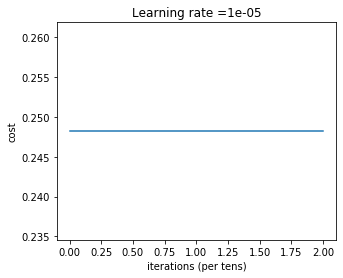

In [63]:
# Training the model

prediction = Deep_Net(train_data, train_label, layer_dims = [12288, 8, 1], learning_rate = 0.00001, num_iterations = 200)

#print('\n\n', prediction)